In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'retina', 'png'}

%load_ext autoreload
%autoreload 2

import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("notebook", font_scale=1.2)

sns.set_style("ticks", {"axes.linewidth": 1.0, "font.sans-serif": "Helvetica"})

params = {
    # Use sans math font
    "text.usetex": False,
    "mathtext.fontset": "stixsans",
    "svg.fonttype": "none",  # Make text editable
}

plt.rcParams.update(params)

In [3]:
# df = pd.concat([pd.read_csv(i, index_col=[0, 1]) for i in glob.glob("*.csv")], axis=1)

# read updated 2021 energy balance and population data
df = pd.read_csv('2021energybalance.csv')
population = pd.read_csv('2021population.csv')

eu28 = pd.read_csv('eu28_iso3.csv')
country = pd.read_csv('countrycode_panacea.csv')
df_eu = pd.merge(eu28, country, left_on = 'COUNTRY', right_on = 'Alpha-3 code', how = 'inner')

df_energy = pd.merge(df, df_eu, on='Country', how='inner')
df_pop = pd.merge(population, df_eu, on='Country', how='inner')

In [19]:
df.loc[(df['FLOW'] == 'ELOUTPUT')]

,UNIT,Unit,COUNTRY,Country,PRODUCT,Product,FLOW,Flow,TIME,Time,Value,Flag Codes,Flags
84,TJ,TJ,WLD,World,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2000,2000,162122.751,NaN,NaN
85,TJ,TJ,WLD,World,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2001,2001,167091.258,NaN,NaN
86,TJ,TJ,WLD,World,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2002,2002,181382.310,NaN,NaN
87,TJ,TJ,WLD,World,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2003,2003,186674.592,NaN,NaN
88,TJ,TJ,WLD,World,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2004,2004,203933.842,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,TJ,TJ,GUY,Guyana,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2016,2016,19.000,NaN,NaN
19883,TJ,TJ,GUY,Guyana,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2017,2017,15.365,NaN,NaN
19884,TJ,TJ,GUY,Guyana,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2018,2018,12.193,NaN,NaN
19885,TJ,TJ,GUY,Guyana,COMRENEW,Biofuels and waste,ELOUTPUT,Electricity output (GWh),2019,2019,8.691,NaN,NaN


In [4]:
def wangle_data_for_plot(year):
    df_2000 = pd.merge(population.loc[(population['Time'] == year)], 
    df_energy.loc[(population['Time'] == year)], on='Country', how='inner')

    df_2000['tjperm'] = df_2000['Value_y'] / df_2000['Value_x']
    data_2000 = df_2000[['COUNTRY', 'FLOW_y', 'tjperm']]

    data_2000 = data_2000.set_index(['COUNTRY','FLOW_y'])
    return data_2000.unstack()

wangle_data_for_plot(2019)

tjperm                                                          \
FLOW_y      ELOUTPUT       EXPORTS       HEATOUT       IMPORTS       INDPROD   
COUNTRY                                                                        
AUT       623.111036  -3638.378232   5258.814865   4084.268660  28662.359426   
BEL       568.468233  -1595.835074    358.964317   4306.334047  10668.290705   
BGR       262.339112  -1136.226734    985.770201    689.245057  11767.812966   
CYP        65.818182      0.000000     58.490909   3438.228750   2146.662727   
CZE       479.506092  -1843.088613   1076.911528   1620.755801  18369.504564   
DEU       685.666145  -1369.890223   1462.041160   1181.333107  15748.384011   
DNK      1158.284192   -202.592921  15610.561340  13525.604158  19886.189278   
ESP       139.214437  -1879.515856      0.000000   1488.701987   7500.214943   
EST      1073.003008 -22146.915940   9871.754887   2083.505940  57747.307820   
FIN      2500.024819   -403.876775  15015.217391   1360.172246  77304.199909   
FRA       163.754506   -599.701442   1269.113979   1331.059127  10353.862126   
GBR       628.341228   -222.429454     81.422156   3010.296352   6657.233750   
GRC        64.547295    -97.825438      0.000000    505.043685   4358.939972   
HRV       215.823096  -2580.675627    884.938575   1186.081351  16422.215848   
HUN       253.019447  -2019.068229    518.219038   1424.421781  12001.350778   
IRL       232.608519    -56.922637      0.000000   1497.639594   5083.068195   
ITA       364.453364   -199.063674    776.848144   1900.306228   8598.119891   
LTU       221.827957  -4167.312616   8554.121864   2873.513405  22464.874158   
LUX       573.214516   -961.789032   4141.869355   9477.031129  12420.797258   
LVA       485.560209 -29052.213979   8037.842408   9077.887696  57633.055654   
MLT        12.802000    -77.966600      1.762000   1090.360000    137.377200   
NLD       441.505418  -3785.539741   1421.470893   2305.052997  12124.665608   
POL       214.921803   -696.992594    555.029878   1194.612915   9438.523105   
PRT       353.507969  -1647.854091      0.000000    393.547405  14391.026424   
ROU        26.040702    -81.769545    154.061674    531.034380   8315.852438   
SVK       315.779817  -1065.833284   1123.119266    945.839596  14939.706972   
SVN       124.678947      0.000000    873.664593   1805.798900  12636.207129   
SWE      1430.544747  -1603.280895  15143.774319   7508.180292  47430.097004   

                      
FLOW_y      TOTTRANS  
COUNTRY               
AUT      2261.797995  
BEL      1768.258721  
BGR      1076.287120  
CYP       510.937045  
CZE      1335.707704  
DEU      1350.213875  
DNK      1532.070258  
ESP      1449.407758  
EST      1025.019925  
FIN      3253.367355  
FRA      1979.818310  
GBR      1031.447952  
GRC       721.387985  
HRV       643.776560  
HUN       867.727799  
IRL      1598.077789  
ITA       885.458588  
LTU      1127.490251  
LUX      8751.357419  
LVA       811.730628  
MLT       910.126600  
NLD      1492.971372  
POL      1117.974517  
PRT      1107.093673  
ROU       891.814783  
SVK      1205.788422  
SVN      1904.607368  
SWE      5652.532704

In [5]:
data_2019 = wangle_data_for_plot(2019)
data_2000 = wangle_data_for_plot(2010)

In [5]:
# data_2000 = df["2000_per_million"].unstack()
# data_2017 = df["2017_per_million"].unstack()

In [6]:
def set_groups(data):
    data["Group"] = "Group 3"
    data.loc[["AUT", "LVA", "EST", "LTU"], "Group"] = "Group 2"
    data.loc[["SWE", "FIN", "DNK"], "Group"] = "Group 1"
    # data.loc["EU28", "Group"] = "EU-28"

set_groups(data_2000)
set_groups(data_2019)

data_2000.columns = ['ELOUTPUT', 'EXPORTS', 'HEATOUT', 'IMPORTS', 'INDPROD', 'TOTTRANS', 'Group']
data_2019.columns = ['ELOUTPUT', 'EXPORTS', 'HEATOUT', 'IMPORTS', 'INDPROD', 'TOTTRANS', 'Group']

In [129]:
data_2000.head()

,ELOUTPUT,EXPORTS,HEATOUT,IMPORTS,INDPROD,TOTTRANS,Group
COUNTRY,,,,,,,
AUT,606.350957,-2249.216567,4410.852512,4243.246172,29154.032584,2481.177309,Group 2
BEL,518.266055,-162.559615,210.431193,2143.562477,11290.779018,1403.504092,Group 3
BGR,4.729730,-358.500405,10.675676,42.827000,5452.346297,75.864811,Group 3
CYP,42.682927,0.000000,6.097561,1184.144512,1439.452439,767.072805,Group 3
CZE,208.079848,-959.562424,450.285171,485.153413,12423.353137,920.342215,Group 3


In [81]:
data_2000.loc["SWE", :]

        Flow_y                  
tjperm  Electricity output (GWh)     1428.251599
        Exports                      -184.627164
        Heat output                 16028.678038
        Imports                      1311.718188
        Production                  49103.083209
        Transport                    1603.659563
Group                                    Group 1
Name: SWE, dtype: object

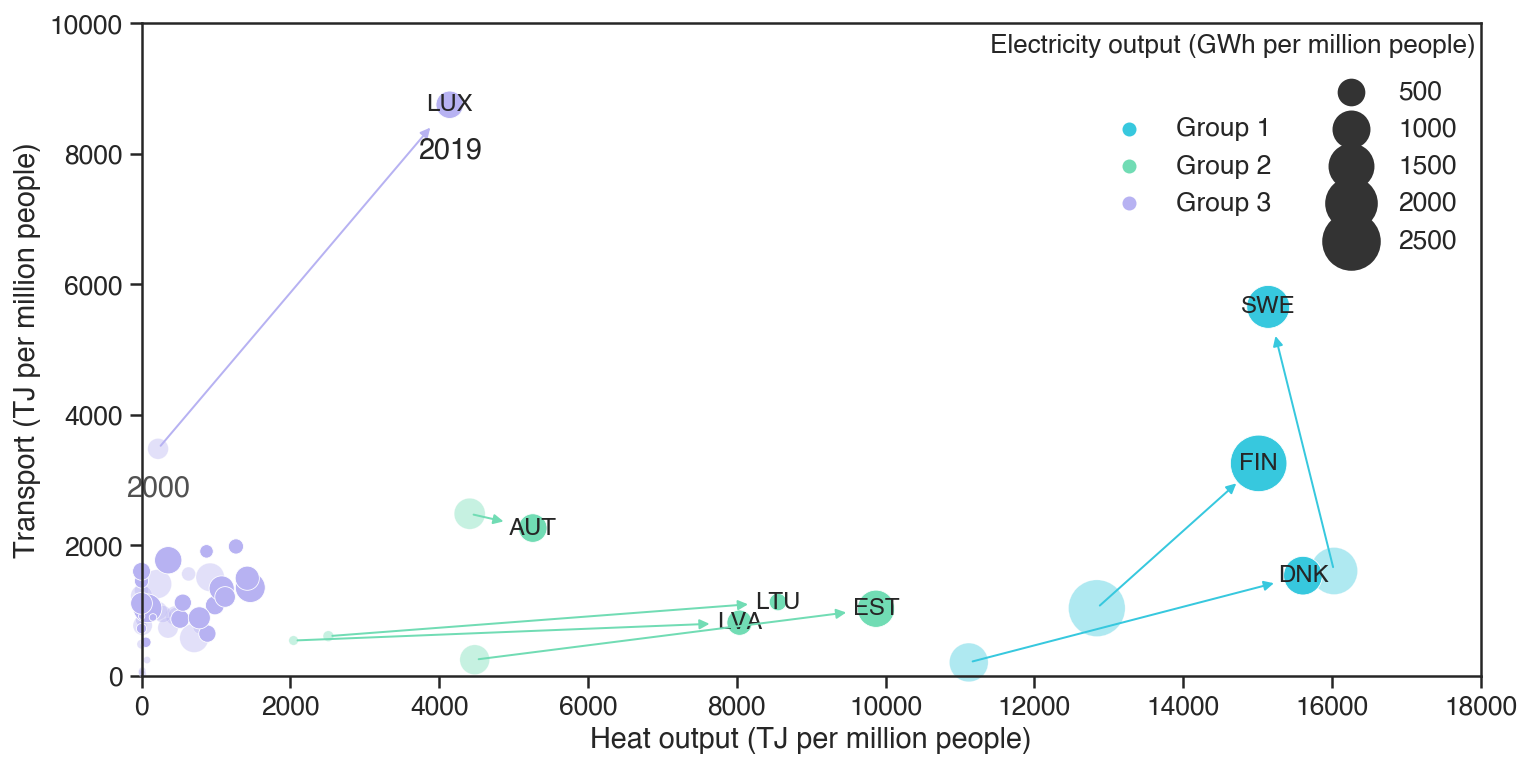

In [22]:
# UPDATE202111: replace all TFC with TOTTRANS --> transport; update 2017 with 2019

# fig = sns.relplot(data=data, x="HEATOUT", y="TFC", size="ELOUTPUT", hue="Group", alpha=0.2, sizes=(10, 800), height=5, aspect=2)
# ax = fig.axes[0][0]

fig, ax = plt.subplots(figsize=(12, 6))

PALETTE = ["#37c8de", "#71dcb4", "#b7b2f2"] #, "#d55c94"

KWARGS = dict(
    x="HEATOUT", y="TOTTRANS", size="ELOUTPUT", hue="Group", sizes=(10, 800),
    hue_order=["Group 1", "Group 2", "Group 3"],
    palette=PALETTE,
    clip_on=False
)

sns.scatterplot(ax=ax, data=data_2000, alpha=0.4, legend=False, **KWARGS)

sns.scatterplot(ax=ax, data=data_2019, **KWARGS)

ax.set_xlim(0, 18000)
ax.set_ylim(0, 10000)

sns.despine(top=False, right=False)

# Text
for idx, row in data_2019.query("Group == 'Group 2' | Group == 'Group 1' | COUNTRY == 'LUX' ").iterrows():
    plt.text(
        row.HEATOUT, row.TOTTRANS, idx, # + max(200, row.ELOUTPUT * 1.4)
#         color=PALETTE[0] if row["Group"] == "Group 1" else PALETTE[1],
        horizontalalignment='center',
        verticalalignment='center',
        size='small',
    )
        

# Arrows
for idx, row in data_2019.query("Group == 'Group 2' | Group == 'Group 1'").iterrows():
    from_ = data_2000.loc[idx, ["HEATOUT", "TOTTRANS"]]
    to_ = [row["HEATOUT"], row["TOTTRANS"]]
    plt.annotate("",
        xytext=from_,
        xy=to_,
        arrowprops=dict(shrinkB=15, arrowstyle="-|>", 
        color=PALETTE[0] if row["Group"] == "Group 1" else PALETTE[1]
        ),
        size=10
    )

# Arrows
for idx, row in data_2019.query("COUNTRY == 'LUX'").iterrows():
    from_ = data_2000.loc[idx, ["HEATOUT", "TOTTRANS"]]
    to_ = [row["HEATOUT"], row["TOTTRANS"]]
    plt.annotate("",
        xytext=from_,
        xy=to_,
        arrowprops=dict(shrinkB=15, arrowstyle="-|>", 
        color=PALETTE[2]
        ),
        size=10
    )

# # EU-28
# plt.text(
#     data_2017.loc["EU28", "HEATOUT"] + 700,
#     data_2017.loc["EU28", "TOTTRANS"] - 1200,
#     "EU-28",
#     horizontalalignment='center',
#     verticalalignment='center',
#     size='medium',
#     color=PALETTE[3]
# )

# 2000 -> 2019
plt.text(
    data_2000.loc["LUX", "HEATOUT"],
    data_2000.loc["LUX", "TOTTRANS"] - 600,
    "2000",
    horizontalalignment='center',
    verticalalignment='center',
    size='medium',
    alpha=0.8
)
plt.text(
    data_2019.loc["LUX", "HEATOUT"],
    data_2019.loc["LUX", "TOTTRANS"] - 700,
    "2019",
    horizontalalignment='center',
    verticalalignment='center',
    size='medium',
)

plt.xlabel("Heat output (TJ per million people)")
plt.ylabel("Transport (TJ per million people)")

handles, labels = ax.get_legend_handles_labels()
labels[0] = ""
labels[4] = ""
ax.legend(handles, labels, frameon=False, ncol=2, bbox_to_anchor=(1, .95))
plt.text(11400, 9550, "Electricity output (GWh per million people)", fontsize=13)

plt.savefig(
    "figure_3_202111_withunit.pdf", dpi=600,
    bbox_inches='tight', pad_inches=0.2
)

In [202]:
data_2000.loc['LUX']

ELOUTPUT     255.913725
EXPORTS      -265.82902
HEATOUT      222.137255
IMPORTS     3650.150784
INDPROD     8338.373333
TOTTRANS    3476.497059
Group           Group 3
Name: LUX, dtype: object